In [0]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors  import ListedColormap
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# ZadA

Hypersphere inscribed within hypercube 

Hypercube corrners: red (0)

Hypercube edges: yellow (1)

Points inside hypercube but not inside hypersphere : blue (2)

Hypersphere points: green (3)
 


Generation

In [0]:
def fill_corners(dimentionality: int, hypersphere_radius: float):
    corners = np.asarray (list(itertools.product([hypersphere_radius, -hypersphere_radius], repeat=dimentionality)))
    label = np.zeros((corners.shape[0],1))
    return np.concatenate((corners, label), axis=1)

def generate_points(points_number: int, hypersphere_radius: float):
    return np.random.uniform(low = -hypersphere_radius, high = hypersphere_radius,size=points_number)
  
def create_edge(row: np.ndarray ,hypersphere_radius: float, edge_points:int):
    edge = np.empty(shape=(1,row.size))
    edge.fill(np.nan)
    for number, dimention in enumerate(row[:-1]):
        points =  np.array([row,]*edge_points)
        label = np.ones(points.shape[0])
        points[:,number] = generate_points(edge_points,hypersphere_radius)
        points[:,-1] = label
        edge =  np.concatenate((edge, points), axis=0)
    return edge[1:,]

def fill_edges(dimentionality: int, hypersphere_radius: float, edge_points: float):
    corners = fill_corners(dimentionality,hypersphere_radius )
    edges = corners
    for corner in corners:
        edge = create_edge(corner,hypersphere_radius , edge_points)
        edges =  np.concatenate((edges, edge), axis=0)
    return edges
  
def fill_hypescube(dimentionality: int, hypersphere_radius: float, points_amount: int):
    return np.random.uniform(low=-hypersphere_radius, high=hypersphere_radius, 
                             size =(points_amount,dimentionality))

def colour_generated_points( hypersphere_radius: float, points: np.ndarray):
    distances = np.sum(points**2,1)
    inside = distances <= hypersphere_radius**2
    outside = distances > hypersphere_radius**2
    inside_points = points[inside]
    outside_points = points[outside]
    inside_label = np.ones((inside_points.shape[0],1))*3
    outside_label  = np.ones((outside_points.shape[0],1))*2
    inside_points = np.concatenate((inside_points,inside_label), axis =1 )
    outside_points = np.concatenate((outside_points,outside_label), axis =1 )
    return np.concatenate((inside_points, outside_points), axis=0)

def create_coloured_hypercube(dimentionality:int, hypersphere_radius: float, points_amount: int, edge_points: int):
    edges_and_corrners = fill_edges(dimentionality, hypersphere_radius, edge_points)
    points_inside_hypercube = fill_hypescube(dimentionality, hypersphere_radius, points_amount)
    coloured_points = colour_generated_points(hypersphere_radius,points_inside_hypercube )
    return np.concatenate((edges_and_corrners, coloured_points), axis =0)
  
  

## PCA

In [0]:
dimentions_to_test = [2, 4 , 5 , 7 ]

In [0]:
cmap = ListedColormap(['#FF0000','#FFFF00','#0000FF','#00FF00'])

### 2D

In [0]:
def visualize_2d_using_PCA(X: np.ndarray, y: np.ndarray, corner_size=1):
    N_COMPONENTS = 2
    dim = X.shape[1]
    pca = PCA(n_components=N_COMPONENTS)
    pca.fit(X)
    X = pca.transform(X)
    plt.clf()
    plt.figure(figsize=(18,18))
    plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, s=0.2)
    corners = np.sum(y==0)
    cor_X = X[:corners,:]
    cor_y = y[:corners]
    print(y[y==2])
    plt.scatter(cor_X[:,0],cor_X[:,1], c=cor_y, cmap=cmap, s=corner_size)
    plt.xlabel('1st pricipal')
    plt.ylabel('2nd principal')
    plt.title("2D visualisation of {}-dimentional hypersphere inscribed within hypercube".format(dim))
    plt.show()

1
2
3
4


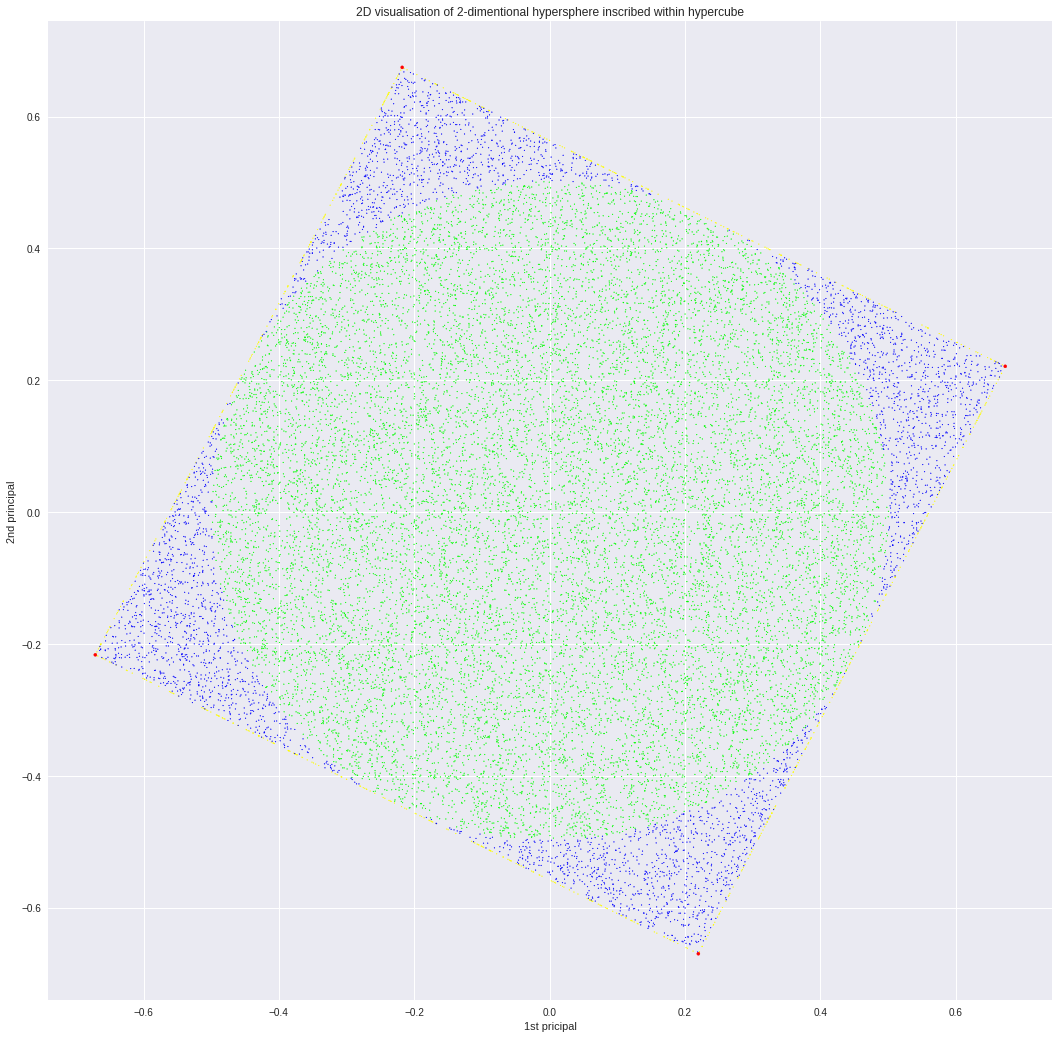

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


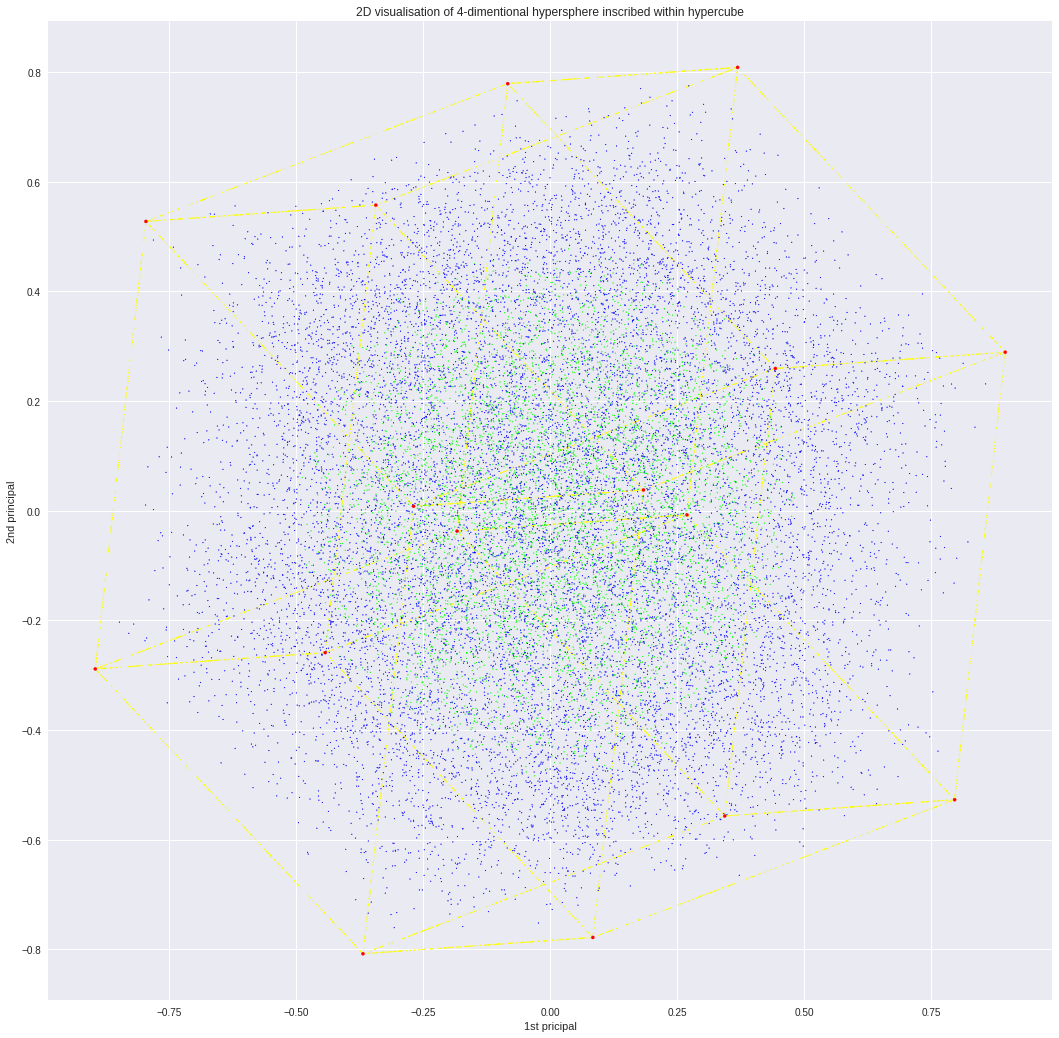

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


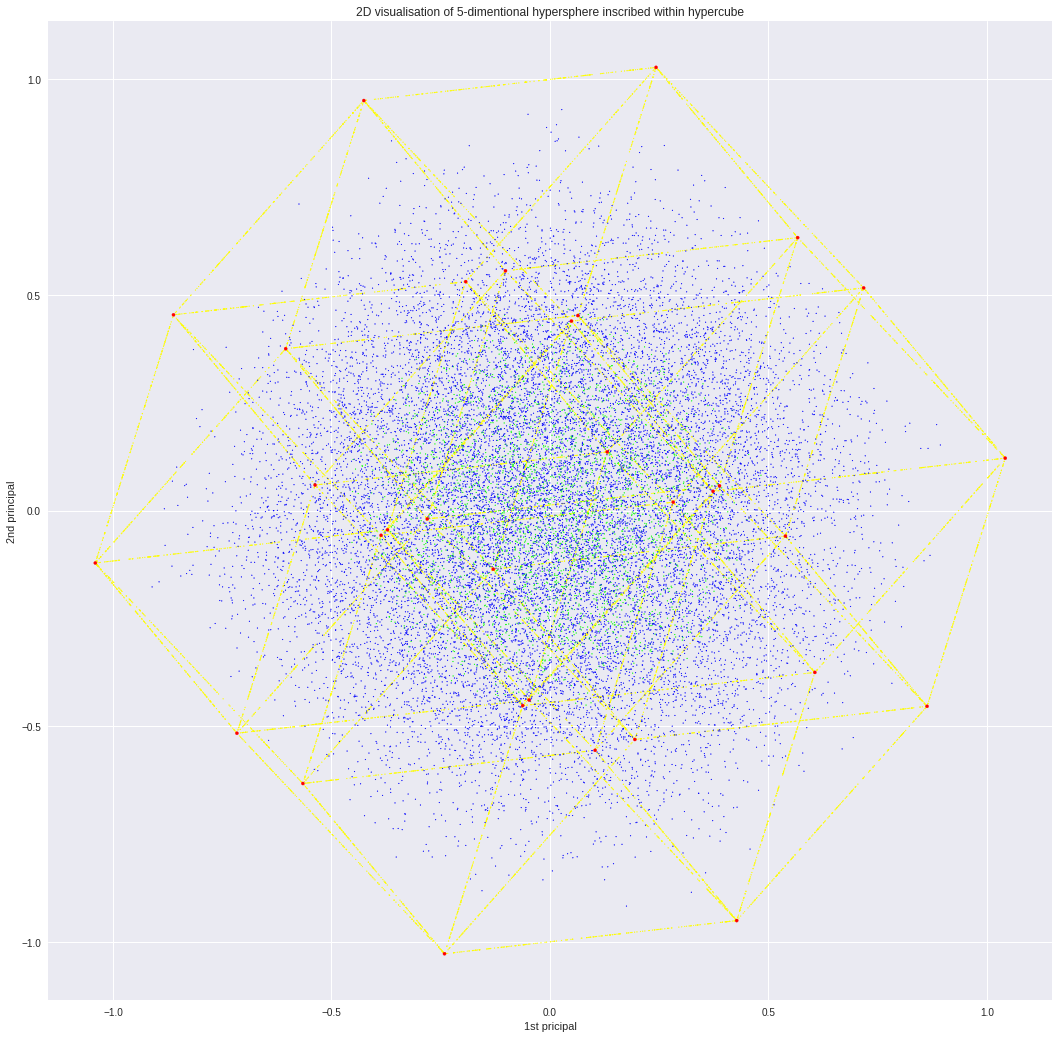

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128


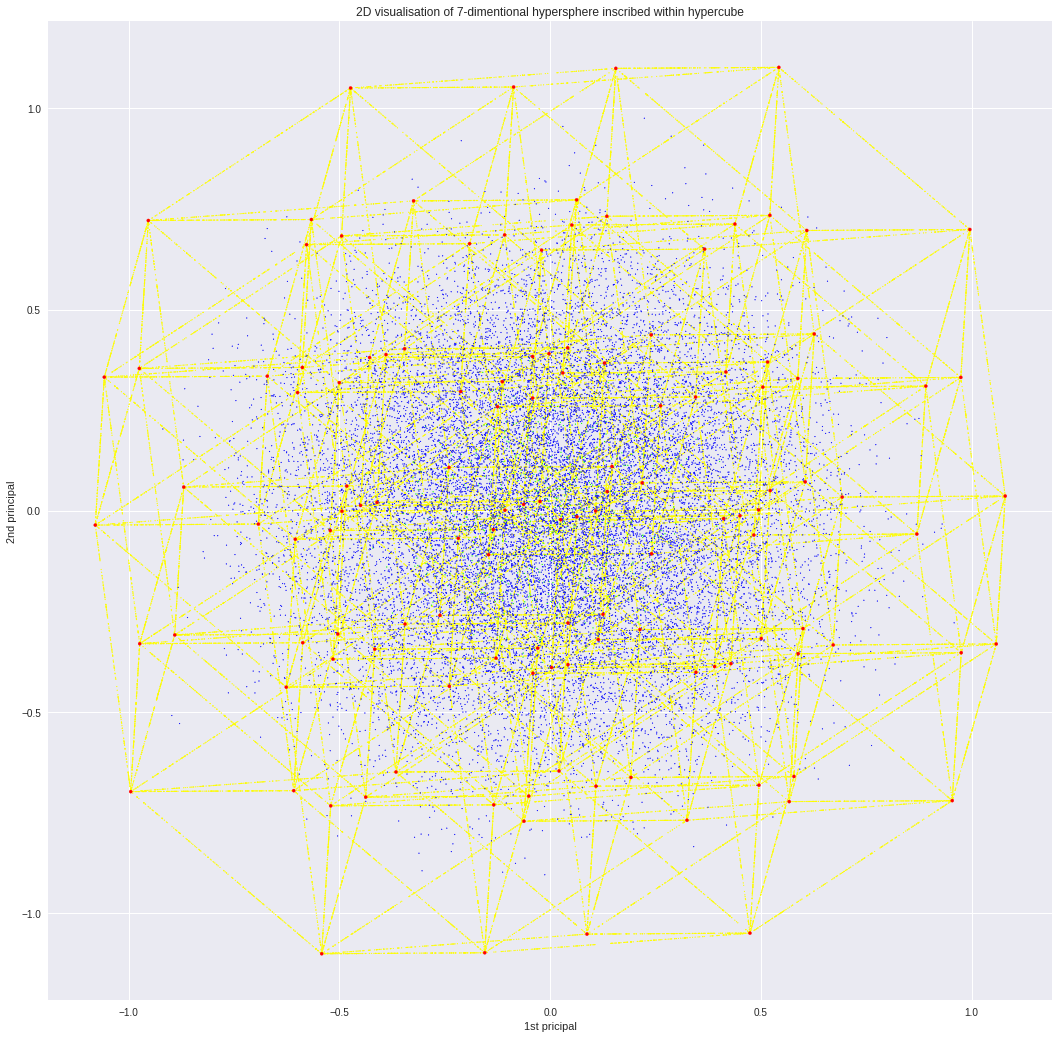

In [14]:
POINTS_AMOUNT = 20_000
EDGES_POINTS = 100
for dimention in dimentions_to_test:
    c_h = create_coloured_hypercube(dimention,0.5, POINTS_AMOUNT, EDGES_POINTS)
    X, y = c_h[:,:-1], c_h[:,-1]
    visualize_2d_using_PCA(X, y, corner_size=10)

for 13 dimentions need to degrease points amount on edges and increase them inside hypercube

generated
[2. 2. 2. ... 2. 2. 2.]


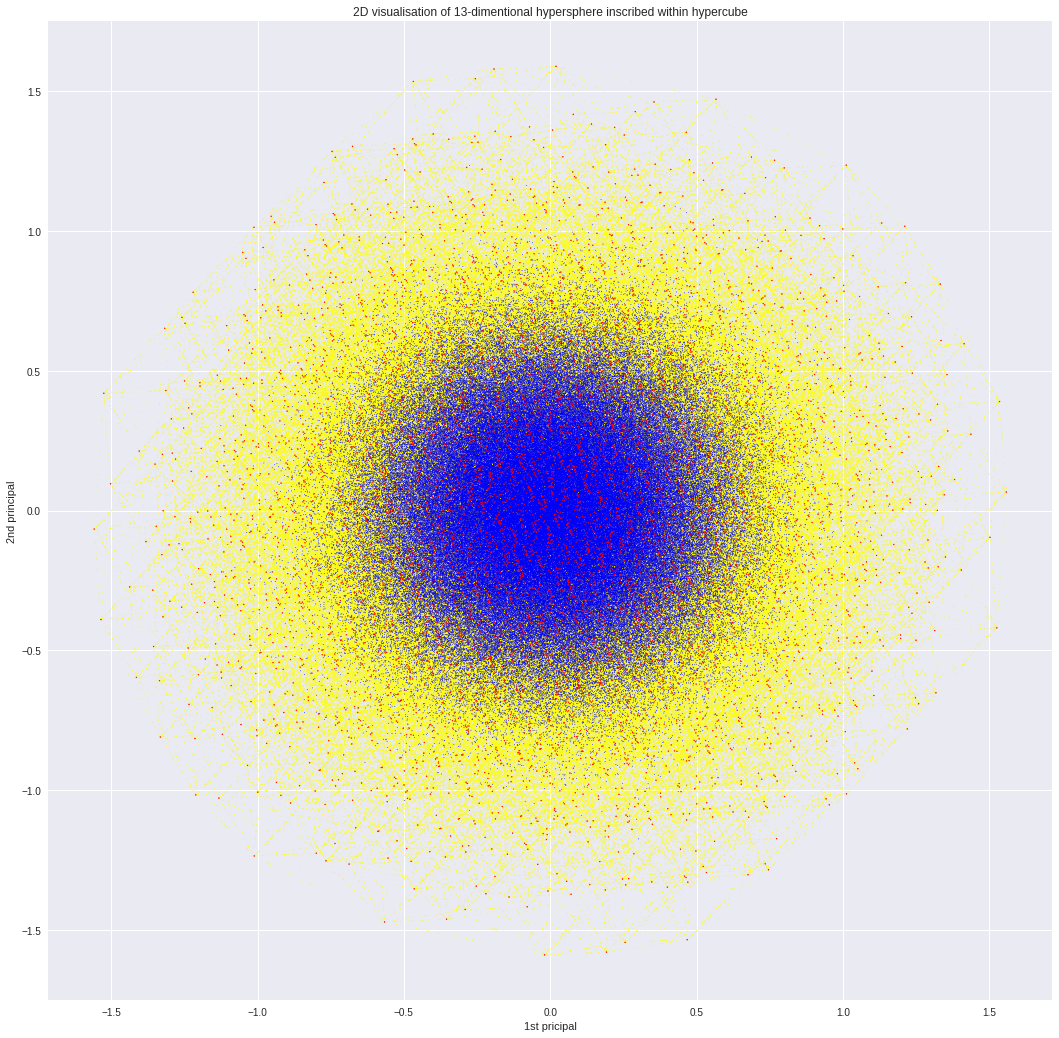

In [8]:
POINTS_AMOUNT = 300_000
EDGES_POINTS = 10
DIMENTION = 13
c_h = create_coloured_hypercube(DIMENTION,0.5, POINTS_AMOUNT, EDGES_POINTS)
X, y = c_h[:,:-1], c_h[:,-1]

visualize_2d_using_PCA(X, y)

### 3D

In [0]:
def visualize_3d_using_PCA(X: np.ndarray, y: np.ndarray,corner_size=1):
    N_COMPONENTS = 3
    dim = X.shape[1]
    pca = PCA(n_components=N_COMPONENTS)
    pca.fit(X)
    fig = plt.figure(1, figsize=(18, 18))
    X = pca.transform(X)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, s = 0.7)
    corners = np.sum(y==0)
    cor_X = X[:corners,:]
    cor_y = y[:corners]
    ax.scatter(cor_X[:,0],cor_X[:,1], cor_X[:,2], c=cor_y, cmap=cmap, s= corner_size)
    ax.set_xlabel("1st principal")
    ax.set_ylabel("2st principal")
    ax.set_zlabel("3st principal")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.title("3D visualisation of {}-dimentional hypersphere inscribed within hypercube".format(dim))
    plt.show()

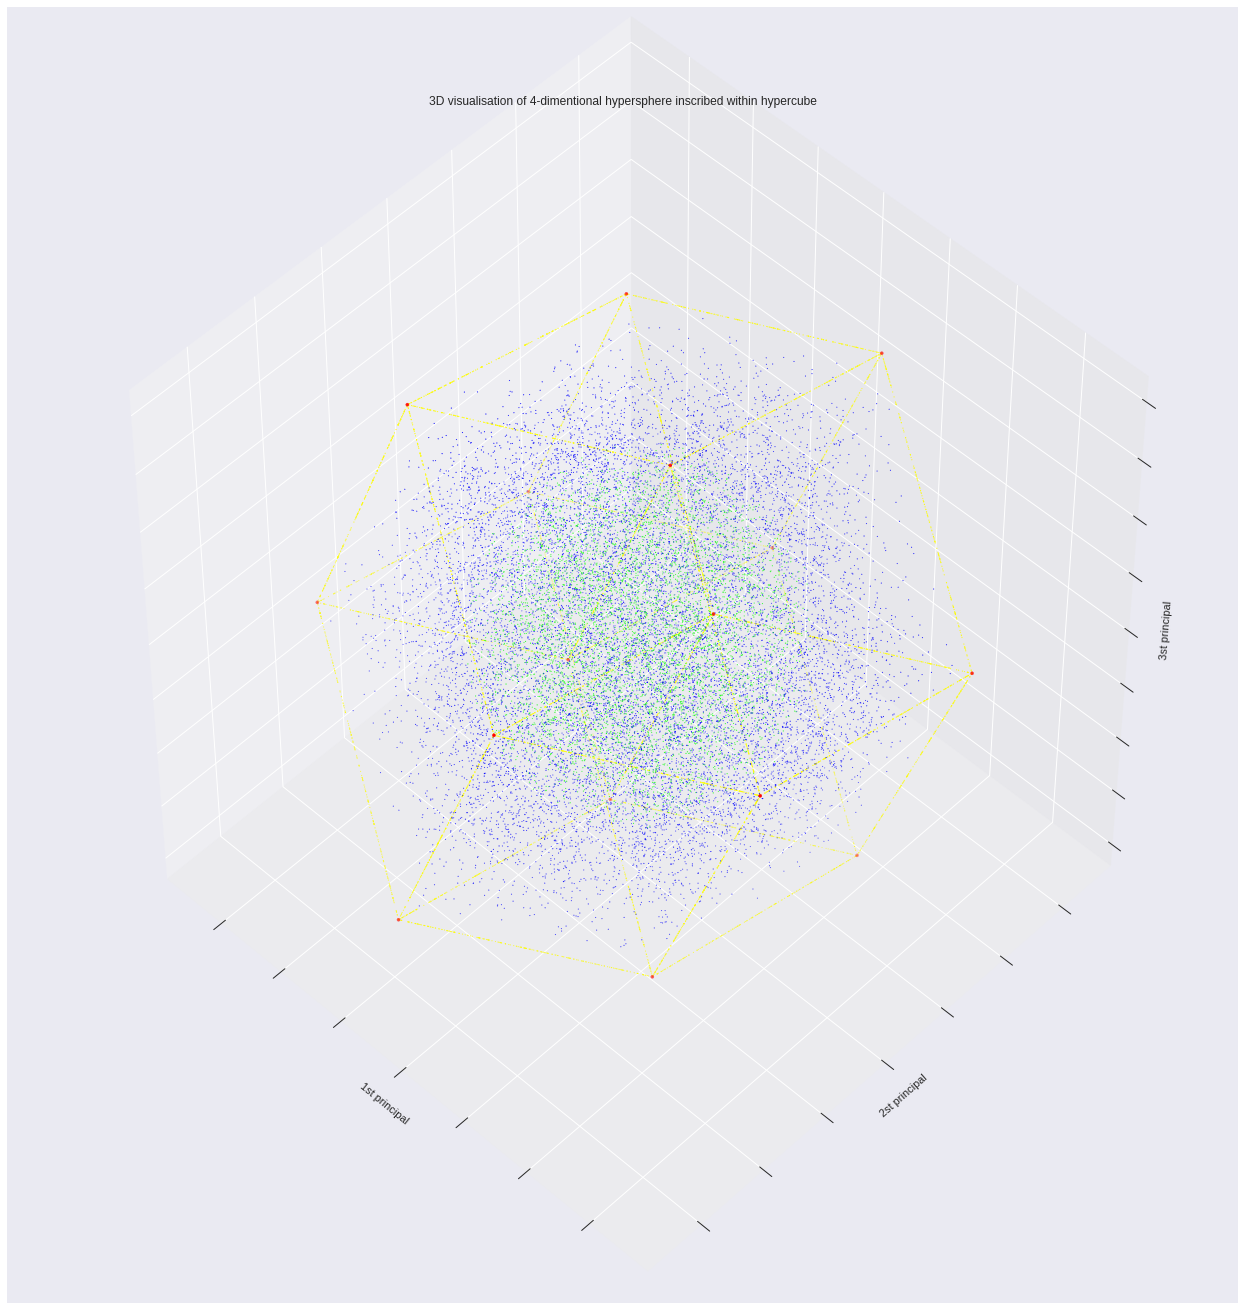

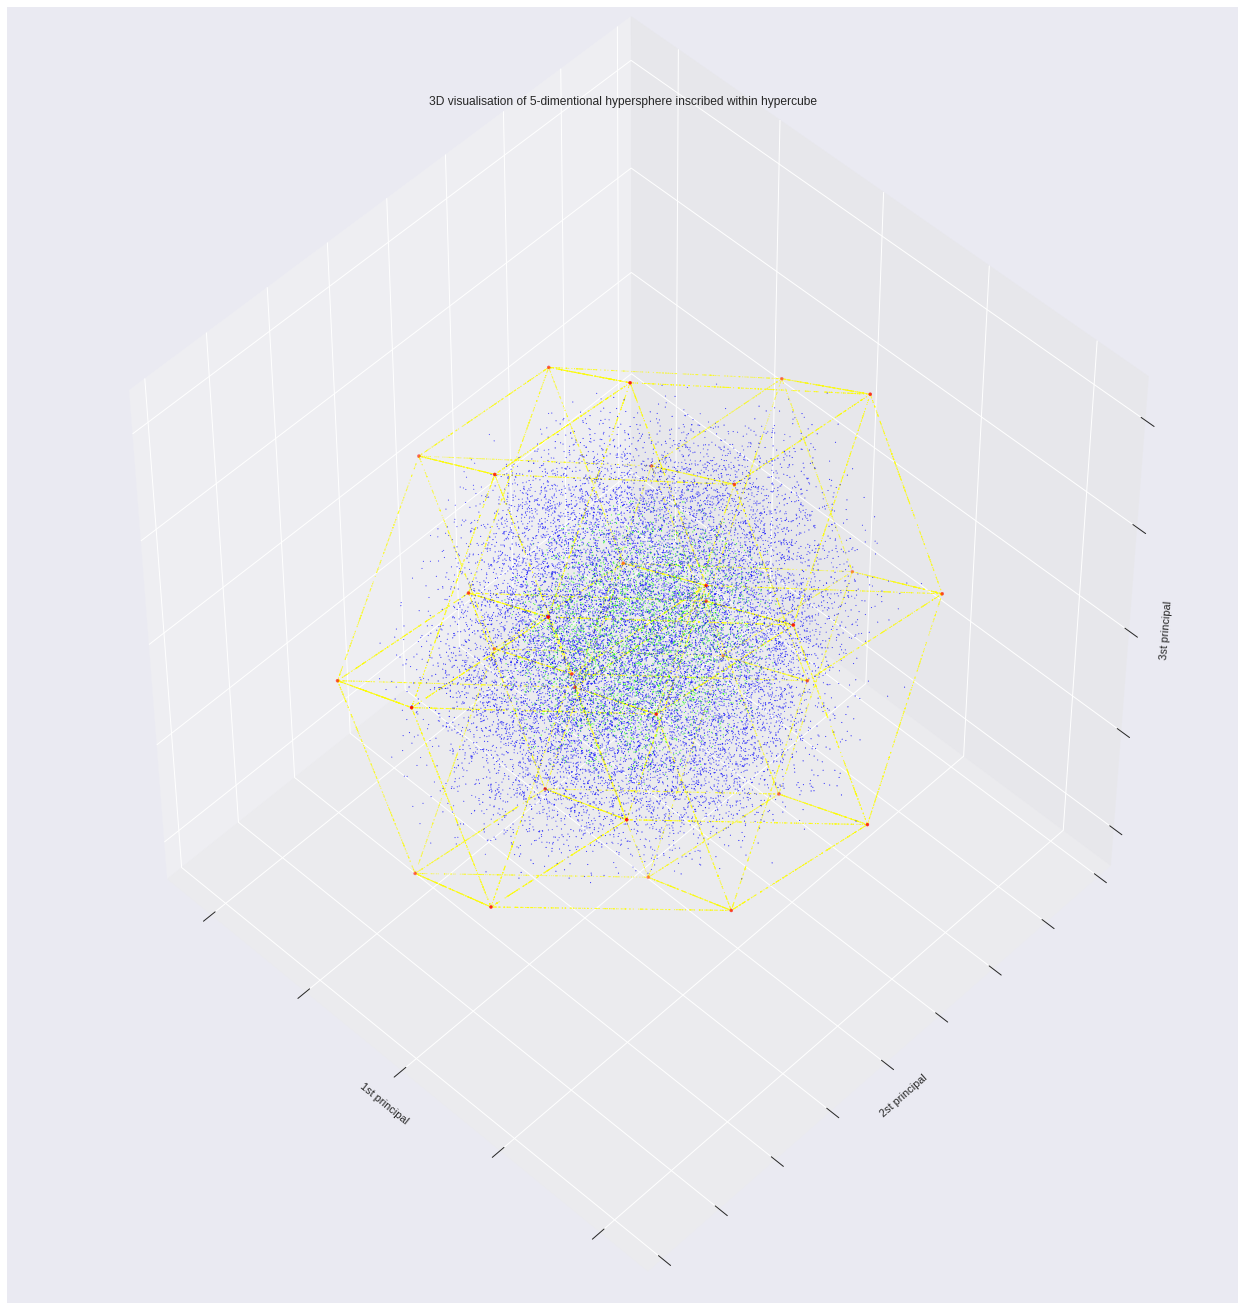

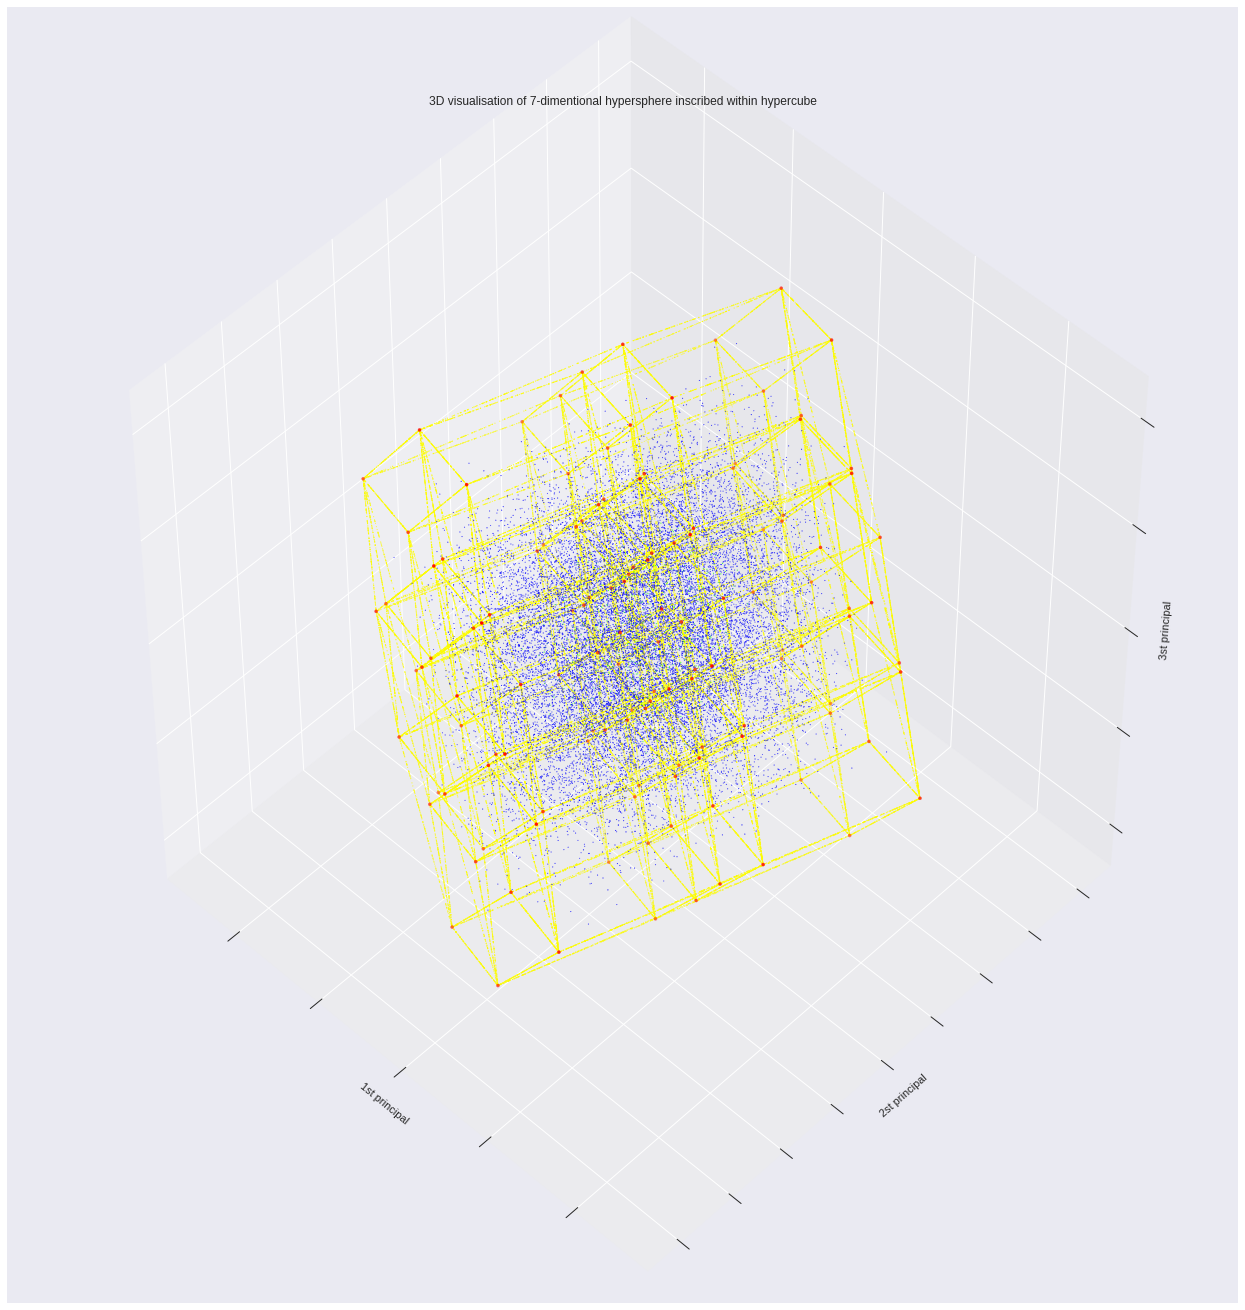

In [12]:
POINTS_AMOUNT = 20_000
EDGES_POINTS = 100
for dimention in dimentions_to_test[1:]:
    c_h = create_coloured_hypercube(dimention,0.5,POINTS_AMOUNT,EDGES_POINTS)
    X, y = c_h[:,:-1], c_h[:,-1]
    visualize_3d_using_PCA(X,y, corner_size=10)

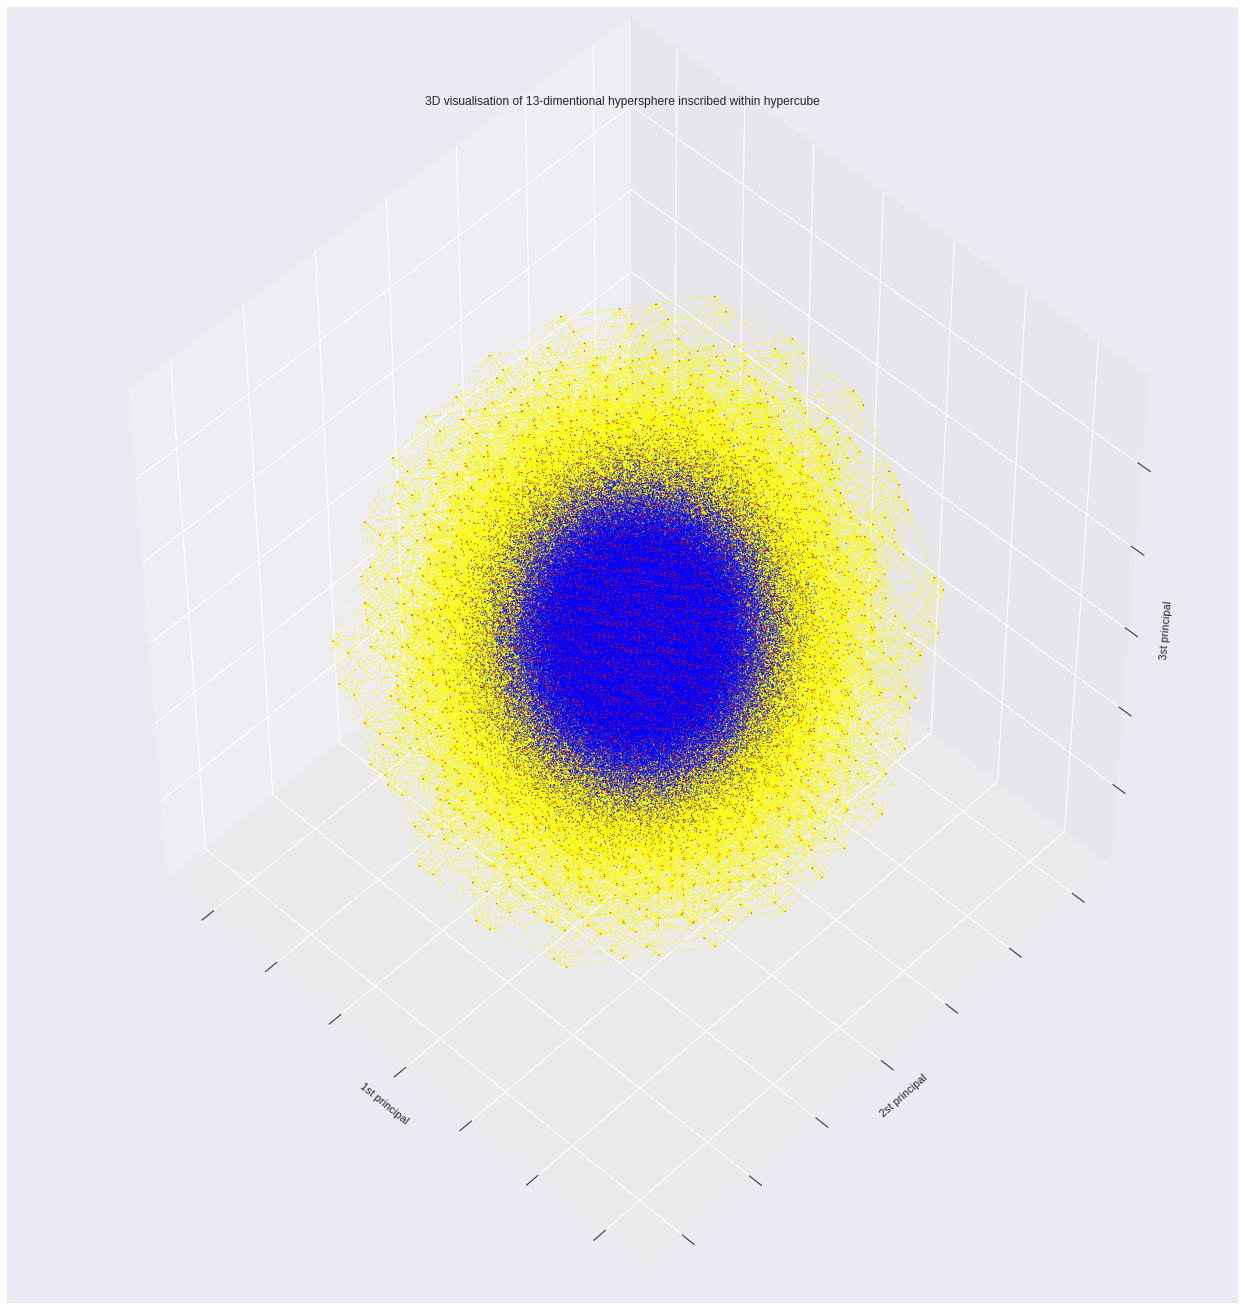

In [10]:
X, y = c_h[:,:-1], c_h[:,-1]

visualize_3d_using_PCA(X, y)

#  Zad B

In [0]:
from PIL import Image
import math
import random
import pandas as pd

prepare dataset

In [0]:
dataset_image = "PCA.png"
rgb_code_dictionary={(255,255,255): -1, (255,0,0):0, (255,255,0):1, (0,0,255):2, (0,255,0):3 }


In [0]:
def distance(c1, c2):
    (r1,g1,b1) = c1
    (r2,g2,b2) = c2
    return math.sqrt((r1 - r2)**2 + (g1 - g2) ** 2 + (b1 - b2) **2)
def get_closest(point):
    colors = list(rgb_code_dictionary.keys())
    closest_colors = sorted(colors, key=lambda color: distance(color, point))
    closest_color = closest_colors[0]
    code = rgb_code_dictionary[closest_color]
    return code
def add_noise(X):
    rand = random.gauss(0, 1)
    return X + rand

In [0]:
def write_data_to_csv(source: str, dest_path: str):
    image = Image.open(source)
    image =image.convert('RGB')
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                if(get_closest(image.getpixel((x,y)))!=-1):
                    dest_file.write(f'{add_noise(x)};{add_noise(y)};{get_closest(image.getpixel((x,y))[0:3])}\n')


In [0]:
def read_dataset_from_csv(dataset):
    dataset_df = pd.read_csv(dataset, sep=';', names=['x', 'y', 'label'])
    X = dataset_df.iloc[:, 0:2]
    y = dataset_df.iloc[:, 2]
    return(X,y)

In [0]:
write_data_to_csv(dataset_image, 'dataset.csv')

In [0]:
X, y =read_dataset_from_csv('dataset.csv')
X = np.array(X)
y = np.array(y)

In [0]:
def vizualize_dataset(X:np.ndarray, y:np.ndarray ):
  plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, s=0.9)

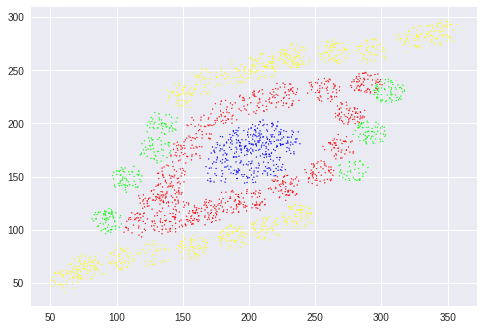

In [59]:
vizualize_dataset(X,y)

In [0]:
N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS)
pca.fit(X)
X_transformed = pca.transform(X)

Text(0.5,1,'2d represenation of 2-dimentional picture after tarnsformation')

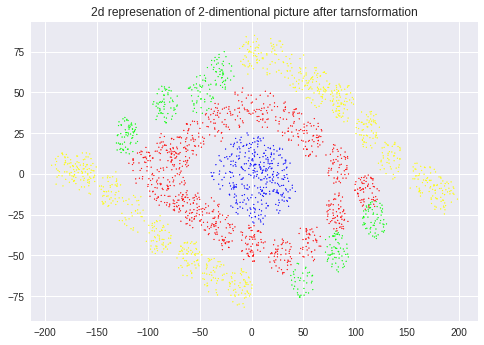

In [69]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=y, cmap=cmap, s=0.9)
plt.title('2d represenation of 2-dimentional picture after tarnsformation')


Text(0,0.5,'y')

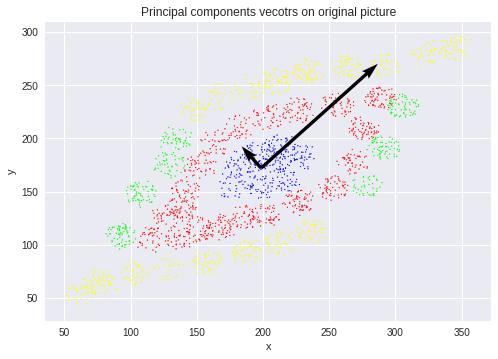

In [62]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, s=0.9)
origin = [np.mean(X[:,0])], [np.mean(X[:,1])]
plt.quiver(*origin, pca.components_[0,0],pca.components_[0,1], scale =20000/pca.explained_variance_[0])
plt.quiver(*origin, pca.components_[1,0],pca.components_[1,1], scale =20000/pca.explained_variance_[1])
plt.title('Principal components vecotrs on original picture')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
from sklearn.decomposition import KernelPCA

In [0]:
def kernel_trick(X: np.ndarray, y: np.ndarray, function: str, **kwargs):
  N_COMPONENTS = 2
  kpca =  KernelPCA(n_components = N_COMPONENTS, kernel=function, **kwargs)
  kpca.fit(X)
  plt.figure(figsize=(9,9))
  X = kpca.transform(X)
  plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, s=2)
  plt.title("Kernel PCA with {0} function".format(function))

Kernel trick with cosine

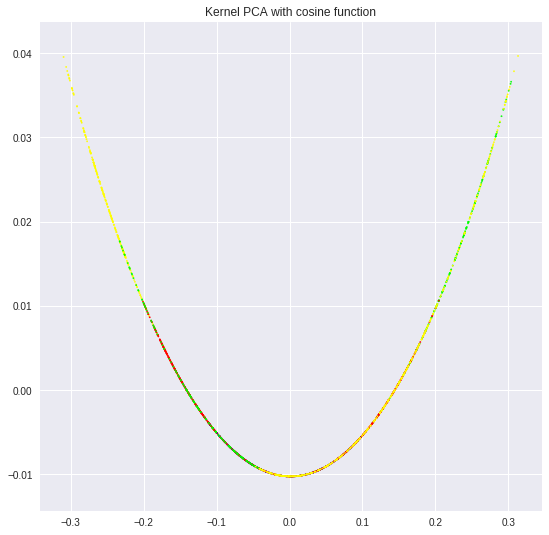

In [65]:
kernel_trick(X,y,'cosine')

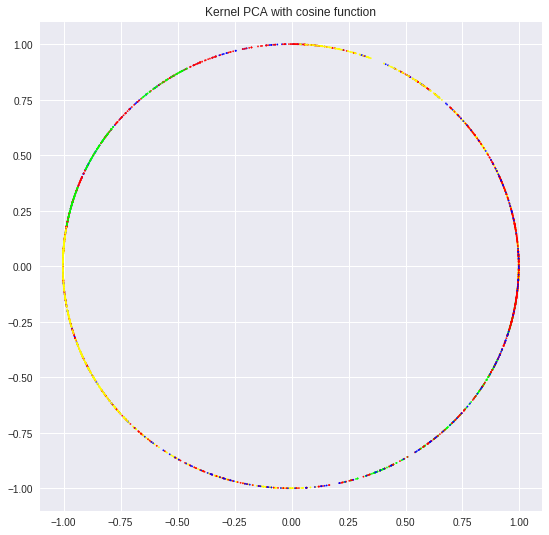

In [68]:
kernel_trick(X_transformed,y,'cosine')

In [0]:
gammas = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

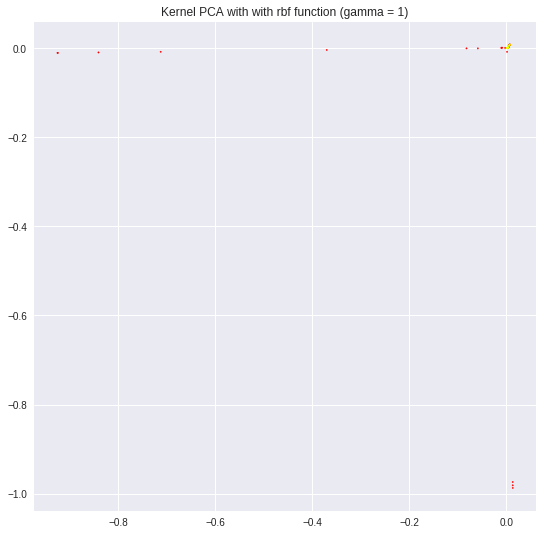

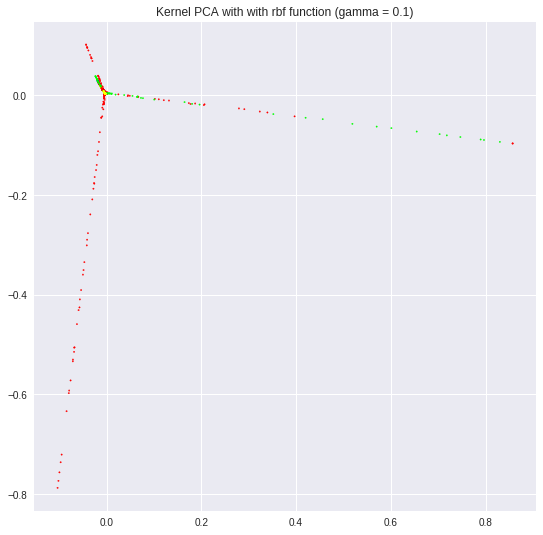

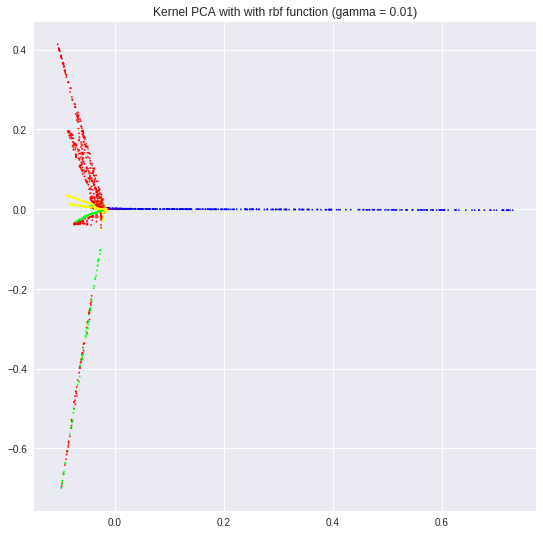

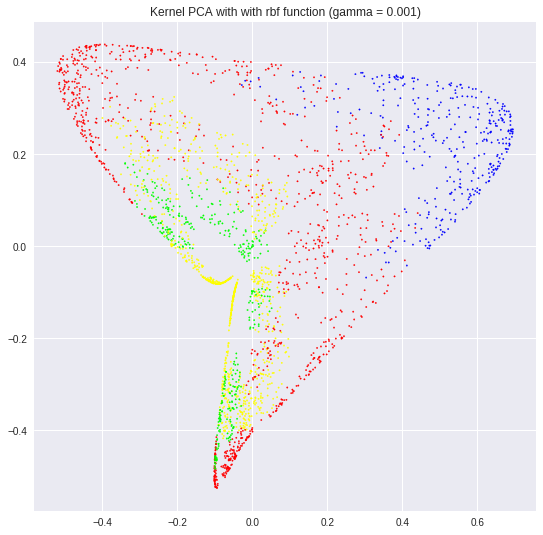

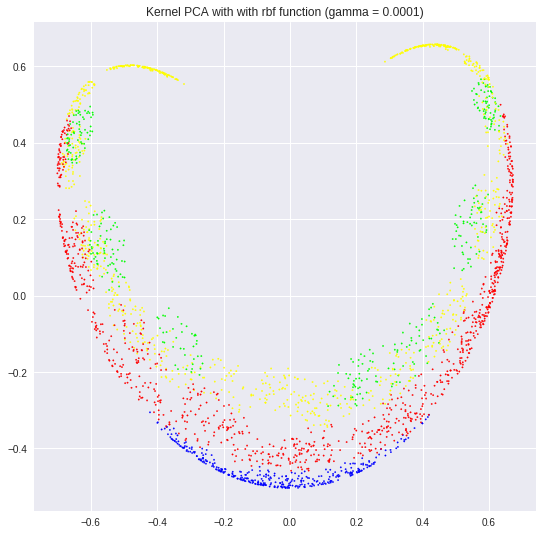

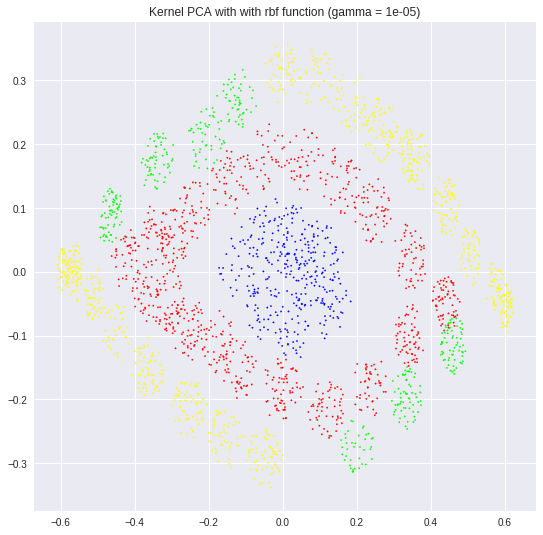

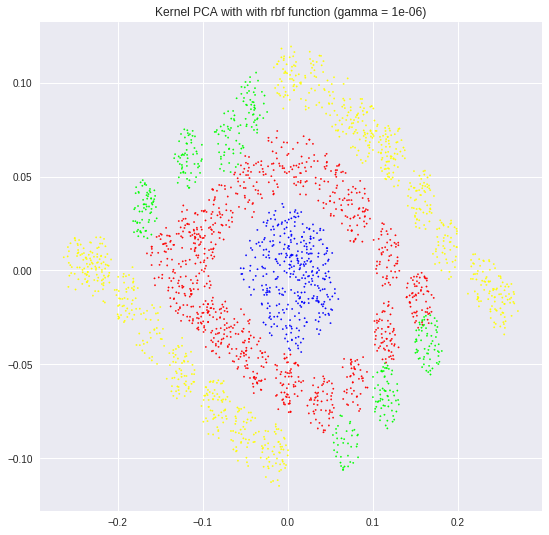

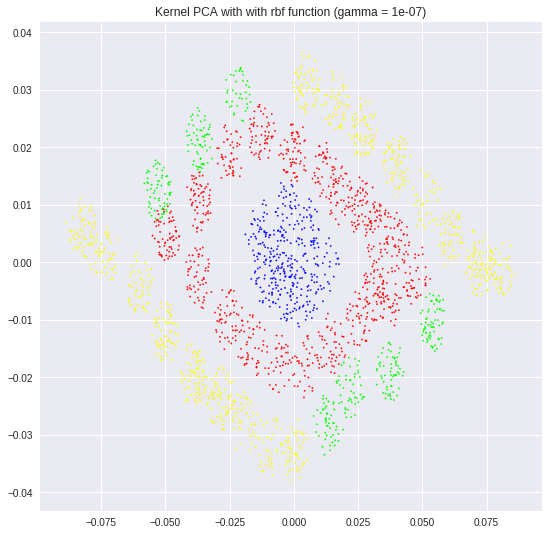

In [77]:
for gamma in gammas:
  kernel_trick(X,y,'rbf', gamma=gamma)
  plt.title('Kernel PCA with with rbf function (gamma = {0})'.format(gamma))
  plt.show()
